# FlameStream workers scalability comparision

In [1]:
require(data.table)

Loading required package: data.table


In [2]:
fs.1w <- tail(scan("fs-1w.data", sep = ","), -200)
fs.2w <- tail(scan("fs-2w.data", sep = ","), -200)
fs.5w <- tail(scan("fs-5w.data", sep = ","), -200)
fs.7w <- tail(scan("fs-7w.data", sep = ","), -200)
fs.10w <- tail(scan("fs-10w.data", sep = ","), -200)

In [3]:
summary(fs.1w)
summary(fs.2w)
summary(fs.5w)
summary(fs.7w)
summary(fs.10w)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  2813000  19240000  26490000  31280000  36480000 941800000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
2.632e+06 2.188e+07 2.902e+07 1.755e+08 4.862e+07 1.540e+10 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
4.591e+06 2.395e+07 3.052e+07 4.375e+07 4.531e+07 1.845e+09 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  8175000  24720000  30780000  40670000  42840000 483400000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  9909000  25930000  31980000  41140000  43870000 389100000 

In [4]:
quntiles <- seq(1, length(fs.1w)) / length(fs.1w)

In [5]:
quantile(fs.1w, p = 0.95)
quantile(fs.2w, p = 0.95)
quantile(fs.5w, p = 0.95)
quantile(fs.7w, p = 0.95)
quantile(fs.10w, p = 0.95)

95% 
65894161

95% 
141828857

95% 
102712323

95% 
97563097

95% 
93857944

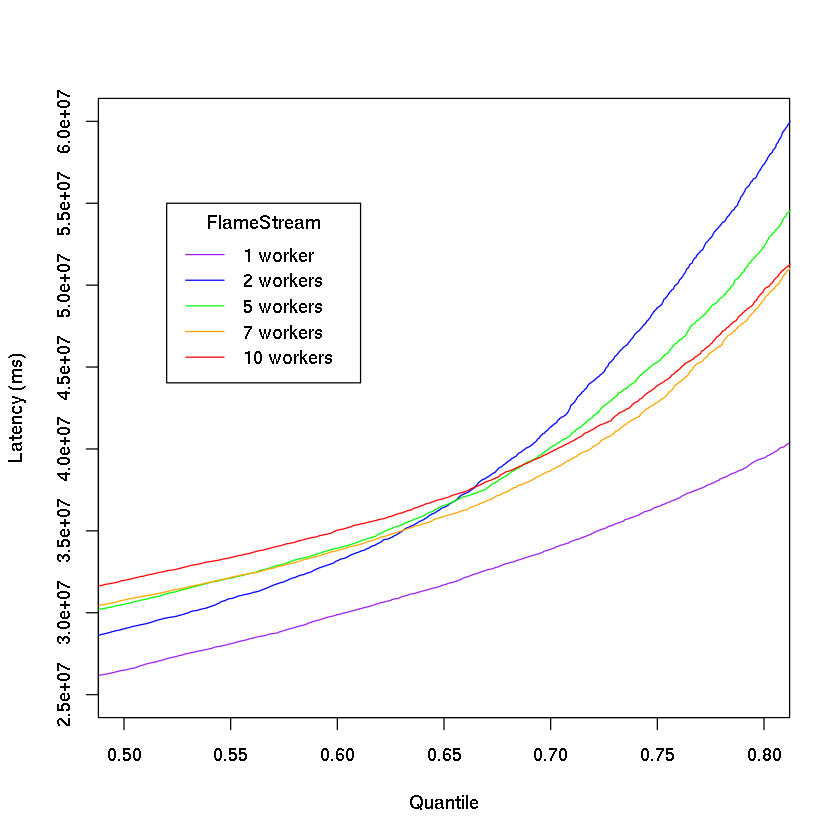

In [6]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.5, 0.8), ylim = c(2.5e7, 6e7), 
     xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.52, 5.5e7, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=1)

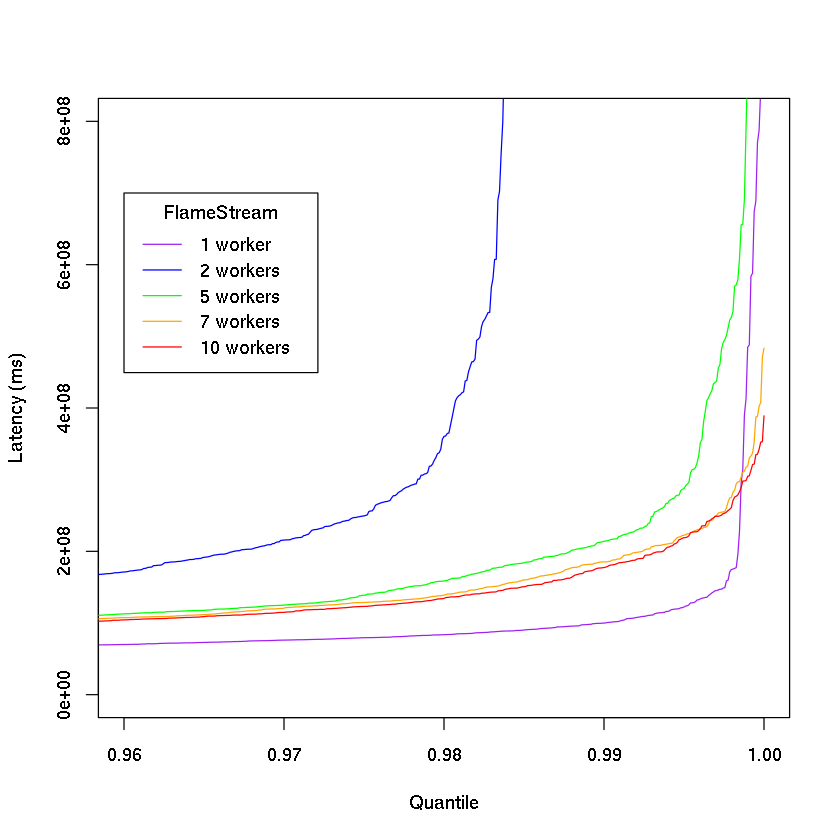

In [7]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.96, 1), ylim = c(0, 8e8), 
     xlab="Quantile", ylab="Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.96, 7e8, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty = 1)

# FlameStream vs Flink quantiles

In [41]:
fl.1w <- tail(scan("fl-1w.data", sep=","), -200)
fl.2w <- tail(scan("fl-2w.data", sep=","), -200)

In [42]:
summary(fl.1w)
summary(fl.2w)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  3167000  61040000 116800000 113200000 163500000 455000000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  3259000  69430000 103100000 103600000 135200000 316700000 

In [10]:

quantile(fl.2w, p=0.95)

95% 
178919583

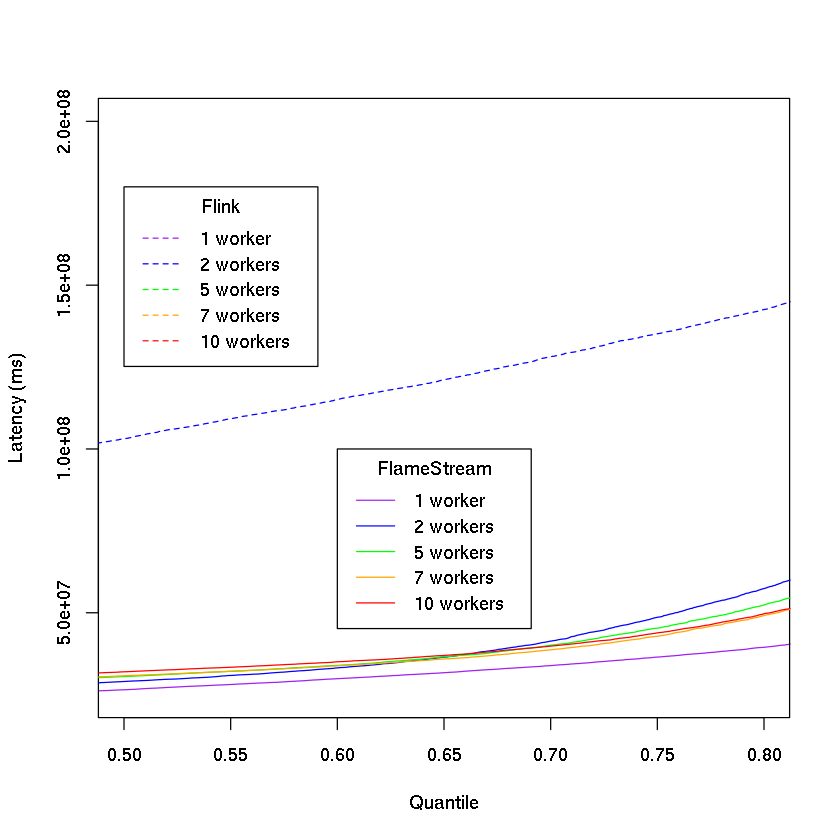

In [11]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.5, 0.8), ylim = c(2.5e7, 20e7), 
     xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.6, 1e8, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=1)

lines(quntiles, sort(fl.2w), col = "blue", lty = 2)
legend(0.5, 1.8e8, title = "Flink", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=2)

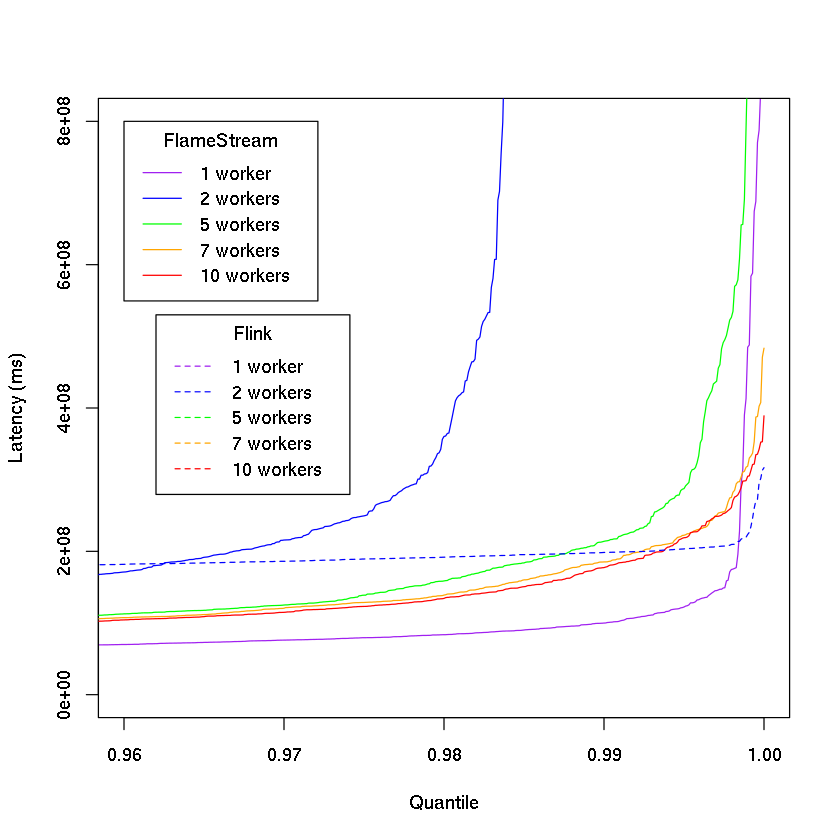

In [13]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.96, 1), ylim = c(0, 8e8), 
     xlab="Quantile", ylab="Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.96, 8e8, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty = 1)

lines(quntiles, sort(fl.2w), col = "blue", lty = 2)
legend(0.962, 5.3e8, title = "Flink", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=2)

In [21]:
m <- matrix(c(quantile(fs.10w, p = 0.5),
        quantile(fs.10w, p = 0.95),
        quantile(fs.10w, p = 0.99),
        quantile(fl.2w, p = 0.5),
        quantile(fl.2w, p = 0.95),
        quantile(fl.2w, p = 0.99)), nrow=3)
colnames(m) <- c("FlameStream", "Flink")
rownames(m) <- c("50%", "95%", "99%")
m

,FlameStream,Flink
50%,31983375,103146998
95%,93857944,178919583
99%,177299690,198446868


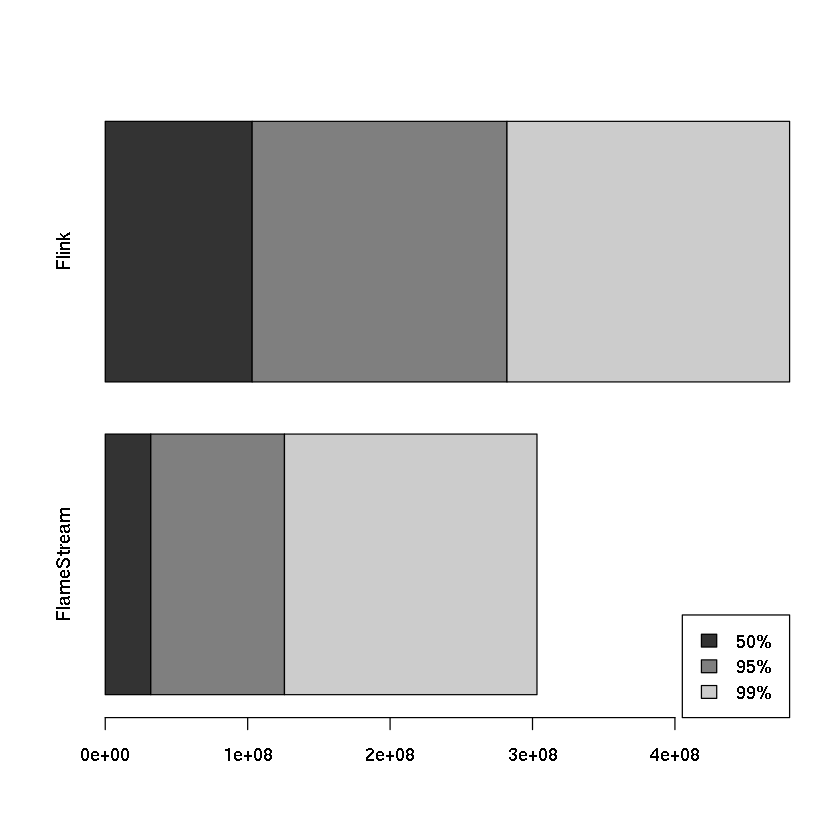

In [40]:
barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"))
legend("bottomright",
       legend = c("50%", "95%", "99%"), 
       fill = c("grey20", "grey50", "grey80"))